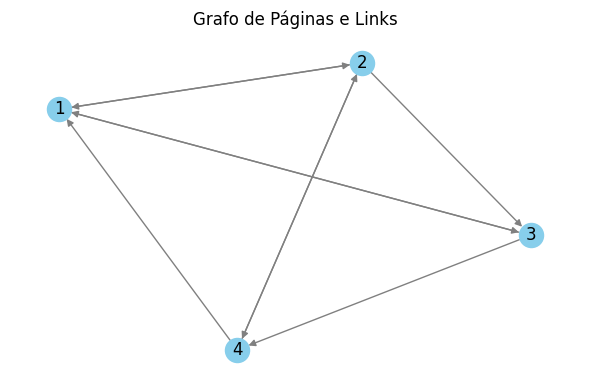

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# 1. Criar o grafo direcionado
G = nx.DiGraph()

# 2. Adicionar as conexões entre páginas (arestas)
edges = [('1', '2'), ('1', '3'), ('2','1') , ('2', '3'), ('2', '4'), ('3', '1'), ('3','4'), ('4','1'), ('4', '2') ]
G.add_edges_from(edges)

# 3. Layout dos nós no plano 2D
pos = nx.spring_layout(G, seed=42)  # layout com física de mola (reprodutível)

# 4. Desenhar o grafo
plt.figure(figsize=(6, 4))
nx.draw_networkx(G, pos,
                 node_color='skyblue',
                 arrows=True,
                 with_labels=True,
                 edge_color='gray')

# 5. Ajustes visuais
plt.title("Grafo de Páginas e Links")
plt.axis('off')
plt.tight_layout()

# 6. Salvar a imagem
plt.savefig('web_grafo.png')
plt.show()


In [5]:

P = np.array([
    [0,   0.5, 0.5, 0  ],
    [1/3 ,  0,   1/3, 1/3],
    [.5,   0,   0,   0.5  ],
    [0.5,   0.5 , 0,   0]
])

In [8]:
np.linalg.matrix_power(P, 2)

array([[0.41666667, 0.        , 0.16666667, 0.41666667],
       [0.33333333, 0.33333333, 0.16666667, 0.16666667],
       [0.25      , 0.5       , 0.25      , 0.        ],
       [0.16666667, 0.25      , 0.41666667, 0.16666667]])

In [7]:
np.linalg.matrix_power(P, 10)

array([[0.30615435, 0.25434028, 0.23576952, 0.20373585],
       [0.3049447 , 0.25505562, 0.23725244, 0.20274724],
       [0.30412085, 0.25483459, 0.23846209, 0.20258247],
       [0.30477993, 0.25236304, 0.23824106, 0.20461597]])

In [9]:
np.linalg.matrix_power(P, 50)

array([[0.30508475, 0.25423729, 0.23728814, 0.20338983],
       [0.30508475, 0.25423729, 0.23728814, 0.20338983],
       [0.30508475, 0.25423729, 0.23728814, 0.20338983],
       [0.30508475, 0.25423729, 0.23728814, 0.20338983]])

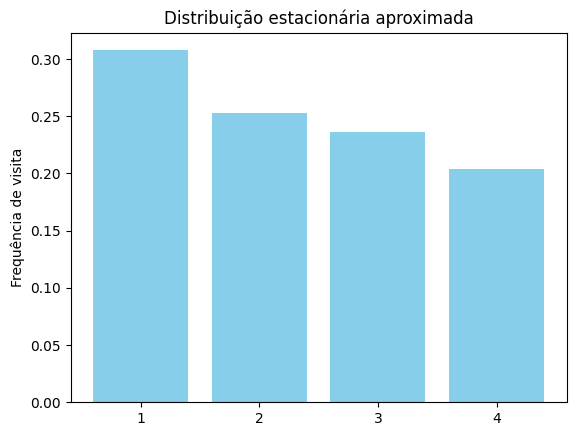

In [ ]:
import numpy as np

# Nomes das páginas
pages = ['1', '2', '3', '4']

# Simular passeio aleatório
np.random.seed(42)
n_steps = 10_000
visits = np.zeros(len(pages))
state = 0  # começa na página A

for _ in range(n_steps):
    visits[state] += 1
    state = np.random.choice(range(4), p=P[state])

# Frequência relativa de visita a cada página
frequencies = visits / n_steps

# Visualização
plt.bar(pages, frequencies, color='skyblue')

# plt.savefig('stationary_dist.png')

plt.title("Distribuição estacionária aproximada")
plt.ylabel("Frequência de visita")
plt.show()


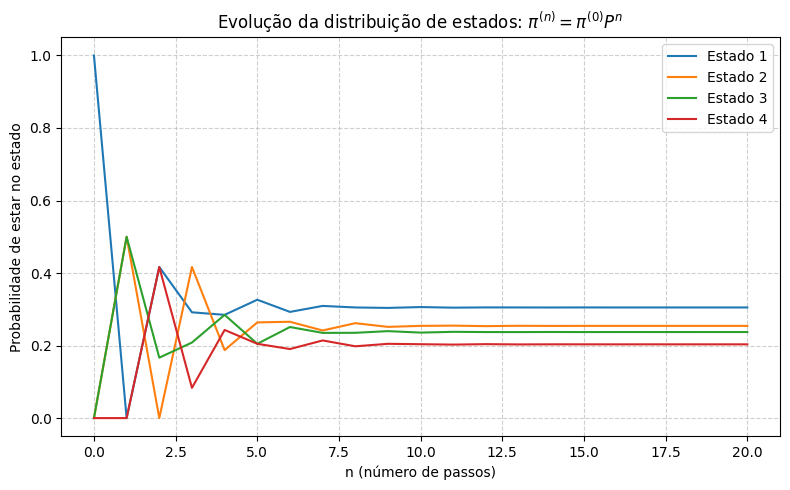

In [12]:

# Número de passos
n_steps = 20
state_labels = ['1', '2', '3', '4']

# Estado inicial: robô começa na página 1
pi_0 = np.array([1, 0, 0, 0])
history = [pi_0]

# Iterativamente calcula π⁽ⁿ⁺¹⁾ = π⁽ⁿ⁾P
for _ in range(n_steps):
    pi_next = history[-1] @ P
    history.append(pi_next)

# Converte para array e plota
history = np.array(history)

plt.figure(figsize=(8, 5))
for i in range(4):
    plt.plot(range(n_steps + 1), history[:, i], label=f'Estado {state_labels[i]}')

plt.xlabel("n (número de passos)")
plt.ylabel("Probabilidade de estar no estado")
plt.title("Evolução da distribuição de estados: $\\pi^{(n)} = \\pi^{(0)} P^n$")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("evolucao_potencias_P.png")
plt.show()
